# Object Oriented Programming 2 - examples and APIs


## Tasks Today:

   

1) <b>Shopping Cart Example</b> <br>
2) <b>Requests and the pokemon API </b> <br>
 

# Goal 
### build a shopping cart program with prices and quantities using objects and a dictionary

In [3]:
from IPython.display import clear_output as clear
# Create a class called cart that retains items and has methods to add, remove, and show

class Cart():
    def __init__(self):
        self.items = {}
        
    def add(self):
        clear()
        new_item = input('What do you want to get?')
        quantity = int(input(f"How many {new_item}s do you want?"))
        if new_item not in self.items:
            self.items[new_item] = quantity
        else:
            self.items[new_item] += quantity
        print(f"{quantity} {new_item}s have been added to the cart.🛒")
        
    def remove(self):
        clear()
        discard = input("What would you like to discard?")
        quantity = int(input(f"How many {discard}s would you like to put back?"))
        if discard in self.items:
            self.items[discard]  -= quantity
            if self.items[discard] <= 0:
                del self.items[discard]
            print(f"{quantity} {discard}s have been removed.")
        else:
            print(f"{discard} was not in your cart.")
        #TODO: Create show method
        self.show()
        
    def show(self):
        print("Your cart contains the items below")
        print("  Item  |  Quantity")
        for item,quantity in self.items.items():
            print(f"{item}  | {quantity}")
            
    def checkout(self):
        clear()
        if not self.items:
            print('Please come back and buy things. ')
        else:
            print("Thanks for shopping")
            self.show()
            
# Control the logic and flow of our program
class Main:
    def __ini__(self):
        name = input("What is your name?")
        my_cart = Cart()
        self.users[name] = my_cart
    
    def showInstructions(self):
        print("""
        Welcome to the Shopping Program!
        Options:
        [1] Show the Current Cart
        [2] Add Item
        [3] Remove Item
        [4] Quit
        """)
        
    def run(self):
        
        my_cart = Cart()
        
        while True:
            self.showInstructions()
            choice = input("What would you like to do?")
            if choice == '1':
                if my_cart.items:
                    my_cart.show()
                else:
                    print('Your Cart is Empty...')
            elif choice == '2':
                my_cart.add()
            elif choice == '3':
                if my_cart.items:
                    my_cart.remove()
                else:
                    print("Your cart is empty... How are you going to remove nothing???")
            elif choice == '4':
                my_cart.checkout()
                break
            else:
                print("Invalid Response... Please select an option above.")
                
my_prog = Main()
my_prog.run()

Please come back and buy things.


# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [5]:
pip install requests

     ---------------------------------------- 63.1/63.1 KB 3.5 MB/s eta 0:00:00
     -------------------------------------- 155.2/155.2 KB 9.1 MB/s eta 0:00:00
     -------------------------------------- 139.0/139.0 KB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 61.2/61.2 KB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\dvndu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
# making an API call
import requests

r = requests.get("https://pokeapi.co/api/v2/pokemon/treecko")
if r.status_code == 200:
    data = r.json()
else:
    print(f"Error Status Cod: {r.status_code}")
    
print(data.keys())

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


### Display a Pokemon's name, weight, abilities, and types

In [7]:
# get the name
name = data["name"]
print(name)

treecko


In [8]:
# get types
types = [pokemon["type"]["name"] for pokemon in data["types"]]
print(types)

['grass']


In [9]:
# get weight
weight = data["weight"]
print(weight)

50


In [10]:
# get abilities
abilities = [pokemon["ability"]["name"] for pokemon in data["abilities"]]
print(abilities)

['overgrow', 'unburden']


In [11]:
# Create a structure for a single pokemon
first_pokemon = {
    "name": "",
    "abilities": [],
    "weight": 0,
    "types": []
}

In [12]:
treecko = {
    "name":name,
    "abilities":abilities,
    "weight":weight,
    "types":types
}
treecko

{'name': 'treecko',
 'abilities': ['overgrow', 'unburden'],
 'weight': 50,
 'types': ['grass']}

#### Create a function to Pull in your own Pokemon's data 

In [18]:
def poke_api_call(pokemon_name_or_id):
    r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{pokemon_name_or_id}")
    if r.status_code == 200:
        data = r.json()
        
        name = data['name']
        types = [pokemon['type']['name'] for pokemon in data['types']]
        abilities = [poke['ability']['name'] for poke in data['abilities']]
        weight = data['weight']
        
        pokemon_x = {
            "name":name,
            "abilities":abilities,
            "weight":weight,
            "types":types
        }
        return pokemon_x
    else:
        print(f"Error Status Code: {r.status_code}")
        
gardevoir = poke_api_call("gardevoir")
bulbasaur = poke_api_call(1)
gardevoir

{'name': 'gardevoir',
 'abilities': ['synchronize', 'trace', 'telepathy'],
 'weight': 484,
 'types': ['psychic', 'fairy']}

Choose your pokemon

In [19]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [21]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for member in your_team:
    poke_stats = poke_api_call(member)
    my_six_pokemon[poke_stats["name"].title()] = poke_stats
    
my_six_pokemon

{'Electabuzz': {'name': 'electabuzz',
  'abilities': ['static', 'vital-spirit'],
  'weight': 300,
  'types': ['electric']},
 'Haunter': {'name': 'haunter',
  'abilities': ['levitate'],
  'weight': 1,
  'types': ['ghost', 'poison']},
 'Tyranitar': {'name': 'tyranitar',
  'abilities': ['sand-stream', 'unnerve'],
  'weight': 2020,
  'types': ['rock', 'dark']},
 'Blaziken': {'name': 'blaziken',
  'abilities': ['blaze', 'speed-boost'],
  'weight': 520,
  'types': ['fire', 'fighting']},
 'Marowak': {'name': 'marowak',
  'abilities': ['rock-head', 'lightning-rod', 'battle-armor'],
  'weight': 450,
  'types': ['ground']},
 'Dragonair': {'name': 'dragonair',
  'abilities': ['shed-skin', 'marvel-scale'],
  'weight': 165,
  'types': ['dragon']}}

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [258]:
class Pokemon(Evolver, Move_Tutor):
    def __init__(self,name):
        self.known_moves = []
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = 0
        self.poke_api_call()
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            data = r.json()

            self.name = data['name']
            self.types = [pokemon['type']['name'] for pokemon in data['types']]
            self.abilities = [poke['ability']['name'] for poke in data['abilities']]
            self.weight = data['weight']

        else:
            print(f"Error Status Code: {r.status_code}")

        #wht happens when you print
    def __repr__(self):
        return f"You caught a {self.name}!"

### Let's Catch some Pokemon

In [259]:
pikachu = Pokemon("pikachu")

print(pikachu)
print(type(pikachu))
print(pikachu.__dict__)

You caught a pikachu!
<class '__main__.Pokemon'>
{'known_moves': [], 'name': 'pikachu', 'types': ['electric'], 'abilities': ['static', 'lightning-rod'], 'weight': 60}


In [260]:
pokedex = {}
for member in your_team:
    pokeball = Pokemon(member)
    pokedex[member.title()] = pokeball

pokedex

{'Electabuzz': You caught a electabuzz!,
 'Haunter': You caught a haunter!,
 'Tyranitar': You caught a tyranitar!,
 'Blaziken': You caught a blaziken!,
 'Marowak': You caught a marowak!,
 'Dragonair': You caught a dragonair!}

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [261]:
# Display an image in Jupyter notebook
from IPython.display import Image

# display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))


In [262]:
# recreate your pokemon class here
class Pokemon(Evolver,Move_Tutor):
    def __init__(self,name):
        #Move_Tutor.__init__()
        #super
        self.known_moves = []
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = 0        
        self.official_artwork = ""
        self.poke_api_call()

        
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            data = r.json()

            self.name = data['name']
            self.types = [pokemon['type']['name'] for pokemon in data['types']]
            self.abilities = [poke['ability']['name'] for poke in data['abilities']]
            self.weight = data['weight']
            self.official_artwork = data["sprites"]["other"]["official-artwork"]["front_default"]

        else:
            print(f"Error Status Code: {r.status_code}")
        
    def display(self):
        display(Image(self.official_artwork, width = 300))
    


        #wht happens when you print
    def __repr__(self):
        return f"You caught a {self.name}!"

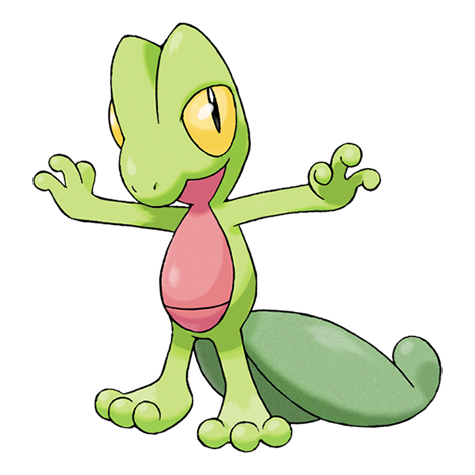

In [263]:
# Calling our new method
treecko = Pokemon("treecko")
treecko.display()

......
Your treecko is evolving!


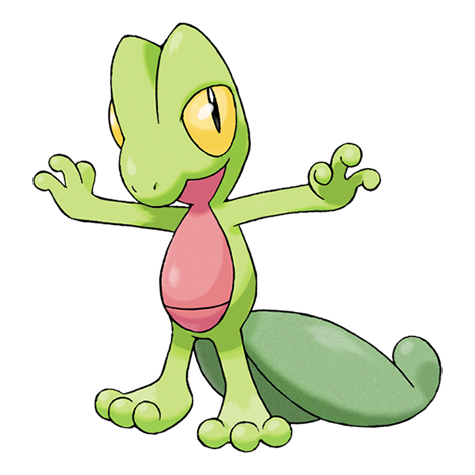

.......


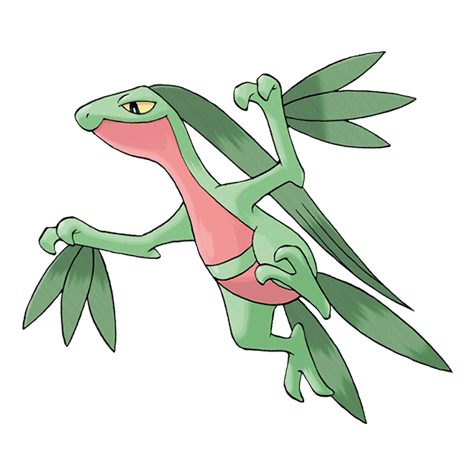

In [264]:

treecko.evolve()

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [265]:
#mixins

from time import sleep
class Evolver:
    
    def evolve(self):
        # API cal to pokemon-species endpoint
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{self.name}/")
        if r.status_code != 200:
            print(f"Species Status : {r.status_code}")
            return
        else:
            pokemon_species = r.json()
            
        r2 = requests.get(pokemon_species["evolution_chain"]["url"])
        if r2.status_code != 200:
            print(f"Evolution Chain Error : {r2.status_code}")
            return
        else:
            ev_chain = r2.json()
            ev_chain = ev_chain["chain"]
            
        #First evolution
        base_name = ev_chain["species"]["name"]
            
        evolution = ev_chain["evolves_to"][0]
            
        #Form 2
        evolution_name = evolution["species"]["name"]
            
        if base_name == self.name:
            pass
        elif evolution_name == self.name:
            evolution_name = evolution["evolves_to"][0]["species"]["name"]
        else:
            print(f"You can't evolve your {self.name} anymore.")
            
        print("......")
        sleep(1)
        print(f"Your {self.name} is evolving!")
        self.display()
        sleep(1)
        print(".......")
        self.name = evolution_name
        self.poke_api_call()
        self.display()
            


Now let's evolve a few

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [266]:
class Move_Tutor:
    
    def __init__(self):
        self.known_moves = []
        
    def teach_move(self):
        new_move = input(f"What new move do you want to teach {self.name}.")
        self.known_moves.append(new_move)
        print(f"Congratulations, {self.name} learned {new_move}")
        #r = requests.get(f"https://pokeapi.co/api/v2/move/{self.name}/")
        
    def show_moves(self):
        print(f"Your current moves are: {self.known_moves}")
        
        


In [267]:
pikachu.teach_move()


What new move do you want to teach pikachu.sdo
Congratulations, pikachu learned sdo


In [268]:
pikachu.show_moves()

Your current moves are: [['sdo']]
